In [116]:
Data_Predicted = test.loc[:,["Item_Identifier","Outlet_Identifier","Item_MRP"]]

In [147]:
data.describe(include=["object"]).columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Type'],
      dtype='object')

In [148]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [149]:
data.loc[data["Outlet_Size"].isnull(),"Outlet_Identifier"].value_counts()

OUT045    1548
OUT017    1543
OUT010     925
Name: Outlet_Identifier, dtype: int64

In [150]:
data.loc[(data["Outlet_Size"].isnull()) & (data["Outlet_Identifier"] == "OUT045") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,1548,1548,1548,1548,1548,0.0,1548,1548
unique,5,1548,16,1,1,0.0,1,2
top,Low Fat,FDU13,Fruits and Vegetables,OUT045,Tier 2,NaN,Supermarket Type1,train
freq,932,1,218,1548,1548,NaN,1548,929


In [151]:
data.loc[(data["Outlet_Size"].isnull()) & (data["Outlet_Identifier"] == "OUT017") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,1543,1543,1543,1543,1543,0.0,1543,1543
unique,5,1543,16,1,1,0.0,1,2
top,Low Fat,FDU13,Snack Foods,OUT017,Tier 2,NaN,Supermarket Type1,train
freq,928,1,219,1543,1543,NaN,1543,926


In [152]:
data.loc[(data["Outlet_Size"].isnull()) & (data["Outlet_Identifier"] == "OUT010") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,925,925,925,925,925,0.0,925,925
unique,5,925,16,1,1,0.0,1,2
top,Low Fat,FDU13,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store,train
freq,543,1,137,925,925,NaN,925,555


In [153]:
data.loc[(data["Outlet_Location_Type"]== "Tier 2") & (data["Outlet_Type"]=="Supermarket Type1") ,"Outlet_Size"].value_counts()

Small    1550
Name: Outlet_Size, dtype: int64

In [154]:
data.loc[(data["Outlet_Size"].isnull()) & (data["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"] = "Small"
data.loc[ (data["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"].value_counts()

Small    3091
Name: Outlet_Size, dtype: int64

In [155]:
data.loc[(data["Outlet_Location_Type"]== "Tier 3") & (data["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [156]:
data.loc[(data["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Small    880
Name: Outlet_Size, dtype: int64

In [157]:
data.loc[(data["Outlet_Location_Type"]== "Tier 3") ,"Outlet_Size"].value_counts()

Medium    3105
High      1553
Name: Outlet_Size, dtype: int64

In [158]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [159]:
mapping_Item_Type = {'Fruits and Vegetables': "Fruit_Veg",
                    'Household':"HH_HH", 'Health and Hygiene':"HH_HH",
                    'Baking Goods': "Bake_Snacks", 'Snack Foods': "Bake_Snacks",
                    'Canned': "Frozen_Canned", 'Frozen Foods': "Frozen_Canned",
                    'Dairy': "DBBS", 'Breakfast': "DBBS", 'Breads': "DBBS", 'Starchy Foods': "DBBS",
                    'Seafood':"Seafood_Meat", 'Meat': "Seafood_Meat",
                    'Hard Drinks': "Drinks", 'Soft Drinks': "Drinks",
                    'Others':"Others"}

In [160]:
data['Item_Type'] = data['Item_Type'].map(mapping_Item_Type)

mapping_Item_Fat_Content = {'Regular': 1, "reg": 1,'LF': 0,'Low Fat': 0, "low fat":0}
data['Item_Fat_Content'] = data['Item_Fat_Content'].map(mapping_Item_Fat_Content)

mapping_Outlet_Size = {'Small': 1, "Medium": 2,'High': 3}
data['Outlet_Size'] = data['Outlet_Size'].map(mapping_Outlet_Size)

In [161]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,Qty_Sold,Outlet_Age
0,0,FDA15,249.8092,3735.1380,DBBS,0.016047,9.30,1999,OUT049,Tier 1,2.0,Supermarket Type1,train,14.951963,19
1,1,DRC01,48.2692,443.4228,Drinks,0.019278,5.92,2009,OUT018,Tier 3,2.0,Supermarket Type2,train,9.186454,9
2,0,FDN15,141.6180,2097.2700,Seafood_Meat,0.016760,17.50,1999,OUT049,Tier 1,2.0,Supermarket Type1,train,14.809346,19
3,1,FDX07,182.0950,732.3800,Fruit_Veg,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train,4.021967,20
4,0,NCD19,53.8614,994.7052,HH_HH,0.014670,8.93,1987,OUT013,Tier 3,3.0,Supermarket Type1,train,18.467868,31


In [162]:
data = pd.get_dummies(data,columns=["Item_Type","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"],drop_first=True)

In [163]:
X_Cols = ['Item_Fat_Content', 'Item_MRP',
       'Item_Visibility', 'Item_Weight',
       'Qty_Sold', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
y_cols = 'Outlet_Size'

In [165]:
from sklearn.model_selection import train_test_split
X = data.loc[(data[y_cols].notnull()) & (data['Type'] == "train"), X_Cols]
y = data.loc[(data[y_cols].notnull()) & (data['Type'] == "train"), y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [166]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (5577, 27)
Shape of y_train:  (5577,)
Shape of X_test:  (2391, 27)
Shape of y_test:  (2391,)


In [167]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [168]:
def IdentifyKValueCrossValidation(X,Y,startK,endK,cv,scoring):
    k_range = list(range(startK, endK+1))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, Y, cv=cv, scoring=scoring)
        k_scores.append(scores.mean())
    z = [i for i, j in enumerate(k_scores) if j == max(k_scores)]
    
    print("Location for Max Accuaracy is:")
    
    for i in z:
        print(k_range[i])
    
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    
    return k_range[i]

def metrices(Predicted,Actual):
    print("Confusion Matrix for the model is:\n\n {}".format(metrics.confusion_matrix(y_pred=Predicted,y_true=Actual)))
    print("\nAccuracy for the model is: {}".format(metrics.accuracy_score(y_pred=Predicted, y_true= Actual)))
    print("\nArea under the curve for the model is: {}".format(metrics.roc_auc_score(y_score=Predicted,y_true=Actual)))
    print("\nClassification Report for the model is:\n {}".format(metrics.classification_report(y_pred=Y_Predict,y_true=y_test)))

/home/ad/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Location for Max Accuaracy is:
1
Value of K with is: 1


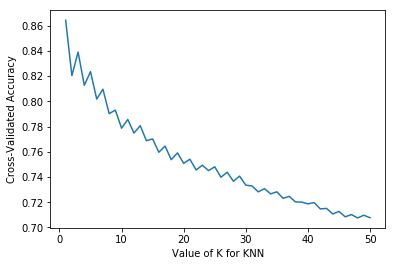

In [169]:
from sklearn.cross_validation import cross_val_score

K = IdentifyKValueCrossValidation(X=X,Y=y,cv=5,startK=1,endK=50,scoring="accuracy")
print("Value of K with is: {}".format(K))

In [170]:
knn = KNeighborsClassifier(n_neighbors=K)
y_predicted = knn.fit(X_train,y_train).predict(X_test)
print("Test Accuracy: ", (y_predicted == y_test).astype(int).sum()/y_test.shape[0])

Test Accuracy:  0.8519447929736512


In [172]:
pd.Series(knn.predict(X=data.loc[(data[y_cols].isnull()) & (data['Type'] == "train"), X_Cols])).value_counts()

1.0    303
2.0    252
dtype: int64

In [173]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
md=OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

In [174]:
y_predicted = md.predict(X=X_test)
print("Test Accuracy: ", (y_predicted == y_test).astype(int).sum()/y_test.shape[0])
#pd.Series(y_predicted).value_counts()

Test Accuracy:  1.0


In [175]:
pd.Series(md.predict(X=data.loc[(data[y_cols].isnull()) & (data['Type'] == "train"), X_Cols])).value_counts()

2.0    555
dtype: int64

In [177]:
data.loc[(data["Outlet_Size"].isnull()),"Outlet_Size"] = 2
data["Outlet_Size"].value_counts()

1.0    7071
2.0    5580
3.0    1553
Name: Outlet_Size, dtype: int64

In [178]:
data["Outlet_Size"] = data["Outlet_Size"].astype(int).astype(object)
data["Outlet_Size"].value_counts()

1    7071
2    5580
3    1553
Name: Outlet_Size, dtype: int64

In [179]:
data.isnull().sum()

Item_Fat_Content                    0
Item_Identifier                     0
Item_MRP                            0
Item_Outlet_Sales                5681
Item_Visibility                     0
Item_Weight                         0
Outlet_Establishment_Year           0
Outlet_Size                         0
Type                                0
Qty_Sold                         5681
Outlet_Age                          0
Item_Type_DBBS                      0
Item_Type_Drinks                    0
Item_Type_Frozen_Canned             0
Item_Type_Fruit_Veg                 0
Item_Type_HH_HH                     0
Item_Type_Others                    0
Item_Type_Seafood_Meat              0
Outlet_Identifier_OUT013            0
Outlet_Identifier_OUT017            0
Outlet_Identifier_OUT018            0
Outlet_Identifier_OUT019            0
Outlet_Identifier_OUT027            0
Outlet_Identifier_OUT035            0
Outlet_Identifier_OUT045            0
Outlet_Identifier_OUT046            0
Outlet_Ident

In [180]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [181]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Type', 'Qty_Sold', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [182]:
XCols = ['Item_Fat_Content', 'Item_MRP',
       'Item_Visibility', 'Item_Weight',
       'Outlet_Size', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
YCols = 'Qty_Sold'

In [185]:
XX = data.loc[data["Type"]=="train",XCols]
yy = data.loc[data["Type"]=="train",YCols]
print(XX.shape)
print(yy.shape)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

(8523, 27)
(8523,)


In [186]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)
reg.fit (XX_train,yy_train)
print(reg.intercept_)
reg.coef_

-8138088919840.489


array([ 3.93254357e-01,  1.98166285e-03, -1.35908062e-01, -2.51502978e-02,
       -5.31531499e+13,  3.18078493e+12, -2.86161320e-01,  8.74216286e-02,
       -5.65691650e-02,  2.25050066e-01,  7.45255392e-02, -3.31246892e-01,
        2.40068295e-02, -1.59818445e+12,  7.48026176e+12, -2.15325205e+13,
       -4.36746638e+13,  4.17553855e+13, -2.06209302e+12, -8.42366288e+12,
       -2.52679448e+13,  3.42467750e+13, -9.40357297e+11,  5.08286902e+13,
        1.97627002e+13,  5.65211547e+13, -8.31055895e+13])

In [187]:
print(len(reg.coef_))
len(XCols)

27


27

In [188]:
coef1 = pd.DataFrame(reg.coef_,XCols,columns=["Value"])
#coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

In [189]:
yy_predicted = reg.predict(XX_test)
metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted)

48.7225701316154

In [190]:
r2_score(yy_test, yy_predicted)

0.41786960096311143

In [192]:
data_Predict = data.loc[data["Type"]=="test",XCols]
data_Predict.head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Size,Outlet_Age,Item_Type_DBBS,Item_Type_Drinks,Item_Type_Frozen_Canned,Item_Type_Fruit_Veg,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,0,107.8622,0.007565,20.750,2,19,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8524,1,87.3198,0.038428,8.300,1,11,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8525,0,241.7538,0.099575,14.600,2,20,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8526,0,155.0340,0.015388,7.315,1,11,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8527,1,234.2300,0.118599,13.600,2,33,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [195]:
from sklearn.tree import DecisionTreeRegressor
Dtree = DecisionTreeRegressor(max_depth=3)
Dtree.fit(XX_train,yy_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [196]:
yy_predicted = Dtree.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.865410192892206
0.4161629680485319


In [197]:
Dtree.fit(XX,yy)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [198]:
from sklearn.ensemble import RandomForestRegressor
RForrest = RandomForestRegressor()
RForrest.fit(XX_train,yy_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [199]:
yy_predicted = Dtree.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.44411027965154
0.42119660001717585


In [200]:
Dtree.fit(XX,yy)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [202]:
data_Predict = data.loc[data["Type"]=="test",XCols]
data_Predict.head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Size,Outlet_Age,Item_Type_DBBS,Item_Type_Drinks,Item_Type_Frozen_Canned,Item_Type_Fruit_Veg,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,0,107.8622,0.007565,20.750,2,19,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8524,1,87.3198,0.038428,8.300,1,11,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8525,0,241.7538,0.099575,14.600,2,20,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8526,0,155.0340,0.015388,7.315,1,11,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8527,1,234.2300,0.118599,13.600,2,33,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [204]:
Dtree_Prediction = Dtree.predict(data_Predict)


In [205]:
print(Dtree_Prediction[:5])

[16.49094575 16.49094575  2.41317621 16.49094575 26.50672595]


In [206]:
Data_Predicted["DTree_Prediction"] = pd.Series(Dtree_Prediction) * Data_Predicted["Item_MRP"]

In [208]:
Data_Predicted["Item_Outlet_Sales"] =Data_Predicted["DTree_Prediction"]

In [209]:
Data_Predicted.head(3)

,Item_Identifier,Outlet_Identifier,Item_MRP,DTree_Prediction,Item_Outlet_Sales
0,FDW58,OUT049,107.8622,1778.749689,1778.749689
1,FDW14,OUT017,87.3198,1439.986085,1439.986085
2,NCN55,OUT010,241.7538,583.394519,583.394519


In [210]:
Data_Predicted.drop(["Item_MRP","DTree_Prediction"],axis=1,inplace=True)

In [211]:
Data_Predicted.to_csv("/home/ad/Desktop/submission.csv", index=False)